## Measures Of Central Tendency

It represents the central location of the majority of the data and provides the best description for the dataset.

In [44]:
import numpy as np
import pandas as pd
from scipy import stats 


In [45]:
# Olympics dataset absolute path

file = r'C:\Users\USER\Machine_Learning\Portfolio\olympics_project\Olympics_EDA\120-years-of-olympic-history-athletes-and-results\athlete_events.csv'

#Read CSV
olympics_df = pd.read_csv(file)

In [46]:
#DataFrame

olympics_df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


## Mean.

The mean or average is calculated by dividing the sum of all values by the total number of values.





* Mean is the most common measure of central tendency.
* It might not consistently serve as the optimal metric for determining a central value.
* The calculation of the mean incorporates all values in the data. 
* If you change any value, the mean changes. However, the mean doesn’t always locate the center of the data accurately.
* It is important when you have a symmetric distribution.
* It is important when working with continuous data.


In [47]:
# Method 1: Mean of Olympians Age

sum_of_age = olympics_df['Age'].sum()
number_of_values = olympics_df['Age'].count()

mean = sum_of_age/number_of_values

print('Athletes Mean:',mean)

Athletes Mean: 25.556898357297374


In [48]:
# Method 2: Mean of Olympians Age

mean_age = olympics_df['Age'].mean()
print('Athletes Mean:',mean_age)

Athletes Mean: 25.556898357297374


In [49]:
#Youngest Olympian

olympics_df[olympics_df['Age'] == 10]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
142882,71691,Dimitrios Loundras,M,10.0,NaN,NaN,Ethnikos Gymnastikos Syllogos,GRE,1896 Summer,1896,Summer,Athina,Gymnastics,"Gymnastics Men's Parallel Bars, Teams",Bronze


## Weighted Mean.

 It involves multiplying each value by its corresponding weight, summing up these products, and then dividing the result by the total sum of the weights.

Weighted mean is also commonly used because;

* Some data are more variable than others.
* Data does not always represent differeNT  groups that are  being measured.



 Let use an example of a project that has two parts a written report worth 70% of the grade and a presentation worth 30%.

In [ ]:
#Sample DataFrame

Results = pd.DataFrame({'Name': ['Ken', 'Jane' ,'Margaret','Alice', 'John','William'],'Report': [90,56,67,83,54,69],'Presentation': [40,50,45,10,31,20]})

Results

,Name,Report,Presentation
0,Ken,90,40
1,Jane,56,50
2,Margaret,67,45
3,Alice,83,10
4,John,54,31
5,William,69,20


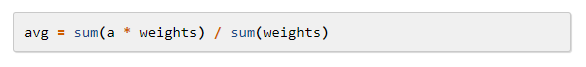

In [ ]:
Ken =  (90*0.7) + (40*0.3)
Jane = (56*0.7) + (50*0.3)
Margaret = (67*0.7) + (45*0.3)
Alice = (83*0.7) + (10*0.3)
John = (54*0.7) + (31*0.3)
William = (69*0.7) + (20*0.3)

In [ ]:
wght = (Ken + Jane + Margaret + Alice + John + William)/6
wght

58.68333333333333

In [ ]:
Weighted_mean = ((Results['Report']* 0.7).sum() + (Results['Presentation'] * 0.3).sum())/Results['Presentation'].count()

Weighted_mean

58.68333333333334

In [ ]:
# Weighted Mean -Method 1

((Results['Grade'] * Results['Weight'] ).sum()) / Results['Weight'].sum()

74.21052631578948

In [ ]:
# Weighted Mean -Method 2

np.average(Results['Grade'] ,weights = Results['Weight'] )

74.21052631578948

## Trimmed Mean

You can determine this by excluding a set number of sorted values from the lower and upper tails and subsequently computing the average of the remaining values. It is common practice to take values between the 5th and 95th percentiles. For instance, a 5% trimmed mean omits the top 5% and bottom 5% of values, focusing on the central 90%. In simpler terms, it considers the middle 90%.

* A trimmed mean eliminates the influence of outliers, preventing them from easily distorting the mean.
* For instance, in an Olympic gymnastics competition with 9 judges, to deter favoritism among the judges, the highest and lowest scores are dropped. The final score is then determined by calculating the mean of the remaining 7 judges' scores.

In [ ]:
trimmed_mean = stats.trim_mean( olympics_df['Age'].dropna() , 0.1)

print('Trimmed Mean:', trimmed_mean )

Trimmed Mean: 24.874036137095466


## Mean in the Distributions

![Alt text](image.png) </br>

Image 1: Shapes of Distributions (The University of Iowa)



* Skewed to the left (left-skewed): The mean and median are less than the mode.
* Skewed to the right (right-skewed): The mean and median are greater than the
mode.
* Symmetric distribution: The mean, median, and mode are the same.

## References and Further Reading

https://www.itl.nist.gov/div898/handbook/eda/section3/eda351.htm

http://homepage.stat.uiowa.edu/~rdecook/stat1010/notes/Section_4.2_distribution_shapes.pdf

Introduction to Statistics AN INTUITIVE GUIDE